2


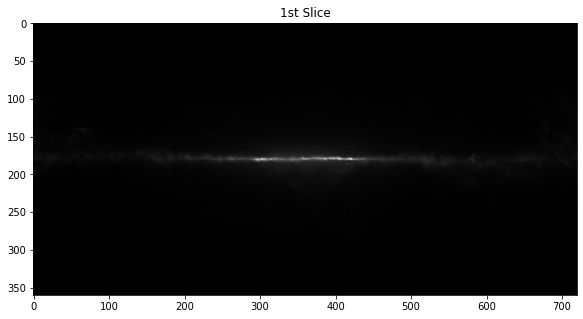

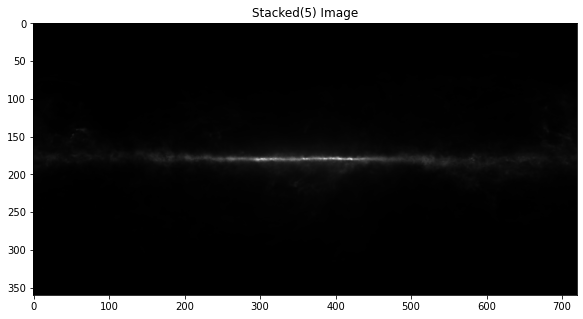

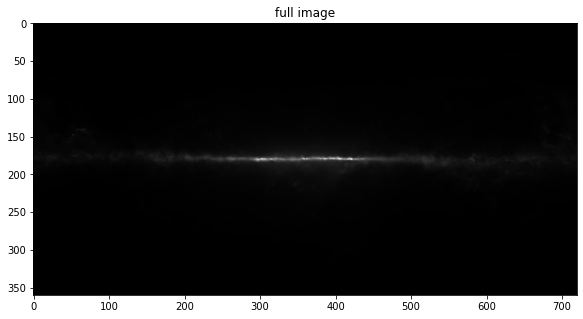

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
hdulist = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')
print(len(hdulist))
#found 2 HDU's
hdu = hdulist[0]
img_data = hdu.data
hdu.header
info = []
info.append(hdu.header['NAXIS3'])
info.append(hdu.header['CTYPE3'])
info.append(hdu.header['CUNIT3'])
info.append(hdu.header['TELESCOP'])
info.append(hdu.header['OBSERVER'])
mini_1 = np.min(img_data)
maxi_1 = np.max(img_data)
sd_1 = np.std(img_data)
p = [mini_1,maxi_1,sd_1]

plt.imshow(img_data[0],cmap='gray',vmin = mini_1,vmax= maxi_1)
plt.title('1st Slice')
plt.show()

img_data_stack = img_data[4] + img_data[9] + img_data[14] + img_data[19] +img_data[24] + img_data[29]
mini_stack = np.min(img_data_stack)
maxi_stack = np.max(img_data_stack)
sd_stack = np.std(img_data_stack)

plt.imshow(img_data_stack,cmap='gray',vmin = mini_stack,vmax= maxi_stack)
plt.title('Stacked(5) Image')
plt.show()

img_full = img_data[0]
for i in range(1,29):
    img_full += img_data[i]
plt.imshow(img_full,cmap = 'gray',vmin = np.min(img_full),vmax = np.max(img_full))
plt.rcParams['figure.figsize'] = [20,5]
plt.title('full image')
plt.show()

In [31]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

def altitude(coordinate,time):
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    coords_alti = coordinate.transform_to(AltAz(obstime = (time - 5*u.hour) + 12*u.hour, location=iitm))
    return(coords_alti.alt)

'''Testing altitude function'''
coord_T = SkyCoord(12.11*u.deg, 85.26*u.deg)
time_T = Time('2021-7-15 00:00:00') 
print(altitude(coord_T,time_T))

11d41m07.8328s
